# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:68: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


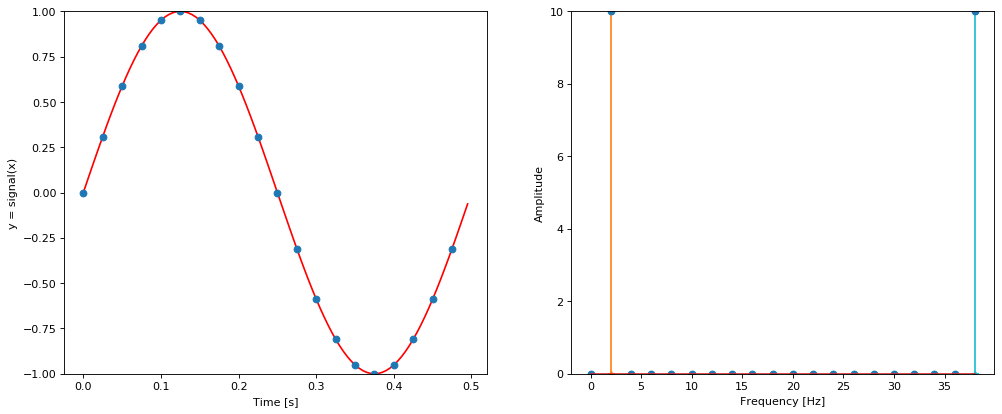

In [32]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_xlabel("Time [s]")
ax.set_ylabel("y = signal(x)")
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))
freqs2 = [v * w / n for v in freqs]


ax = fig.add_subplot(122)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Amplitude")
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs2, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [143]:
# Zdefiniuj funckję
def wyswietlFunkcje(amplituda, liczba_analizowanych_przebiegow, czestotliwosc_probkowania, czestotliwosc_sygnalu, func2 = None):
    A = amplituda
    # Amplituda sygnału

    LP = liczba_analizowanych_przebiegow
    # Liczba analizowanych pełnych przebiegów sygnału (okresów)
    w = czestotliwosc_probkowania       
    # czśstotliwość probkowania [Hz] sygnału 
    #(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

    f = czestotliwosc_sygnalu     
    # Czestotliwosc sygnalu [Hz]

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
    
    FUNC = lambda t : A*sin(2*pi*t*f)    
    if func2 != None:
        FUNC = func2
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("y = signal(x)")
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)/(n/2)
    # modul sygnalu
    print(signal1, angle(signal, deg=True))

    freqs = range(int(n))
    freqs2 = [v * w / n for v in freqs]


    ax = fig.add_subplot(122)
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel("Amplitude")
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs2, signal1, '-*')

    show()

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


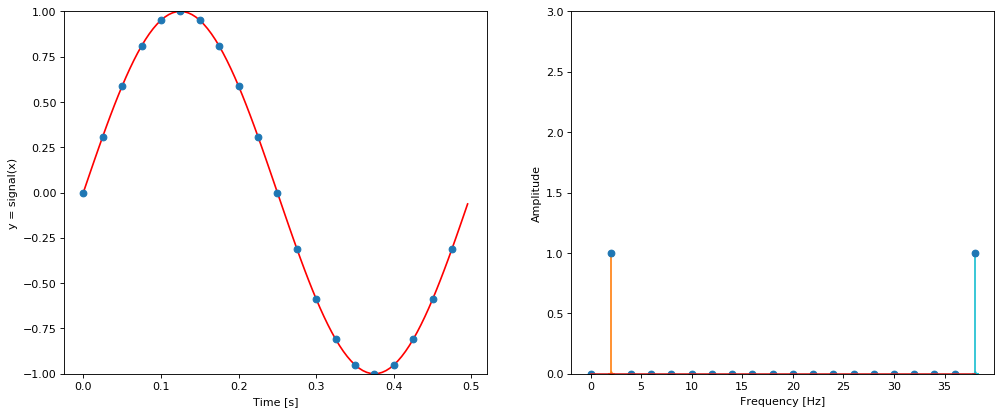

In [112]:
wyswietlFunkcje(1, 1, 40, 2.0)

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [4]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


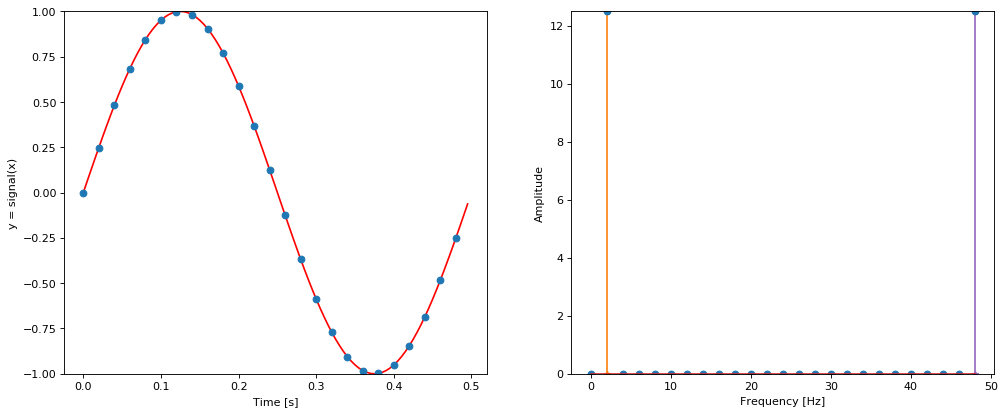

In [35]:
# w=50
wyswietlFunkcje(1, 1, 50, 2.0)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


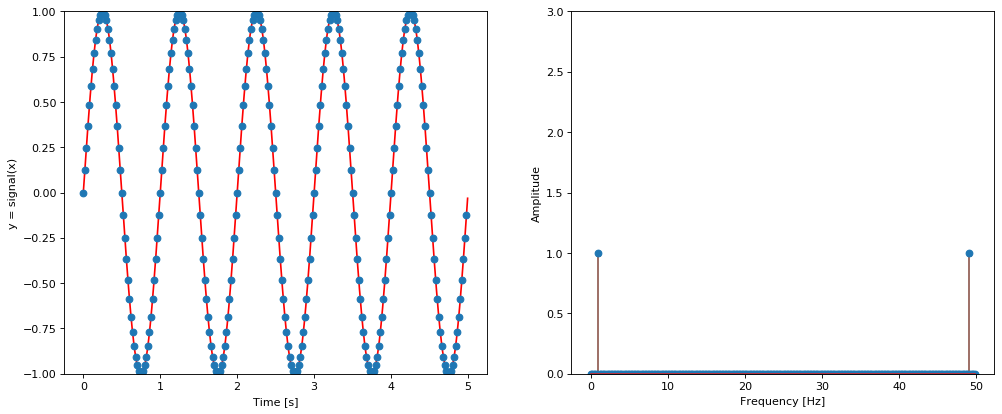

In [67]:
# popraw oś OX
wyswietlFunkcje(1, 5, 50, 1.0)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


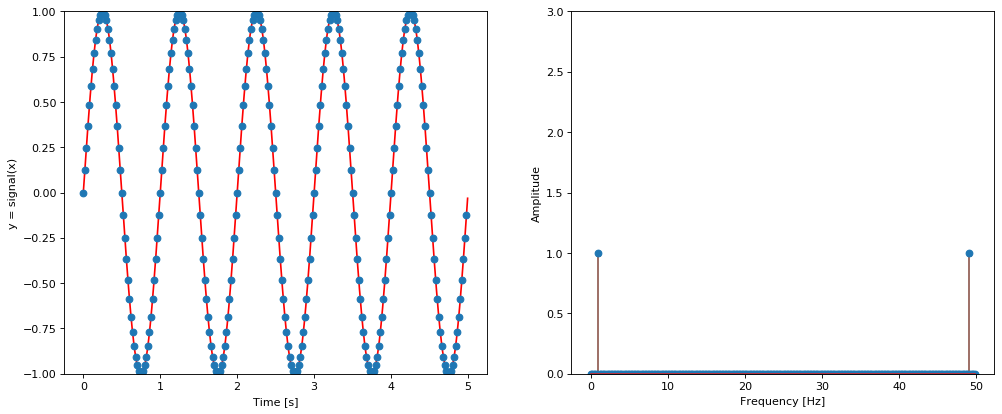

In [68]:
# Podpisz osie wykresów
wyswietlFunkcje(1, 5, 50, 1.0)

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


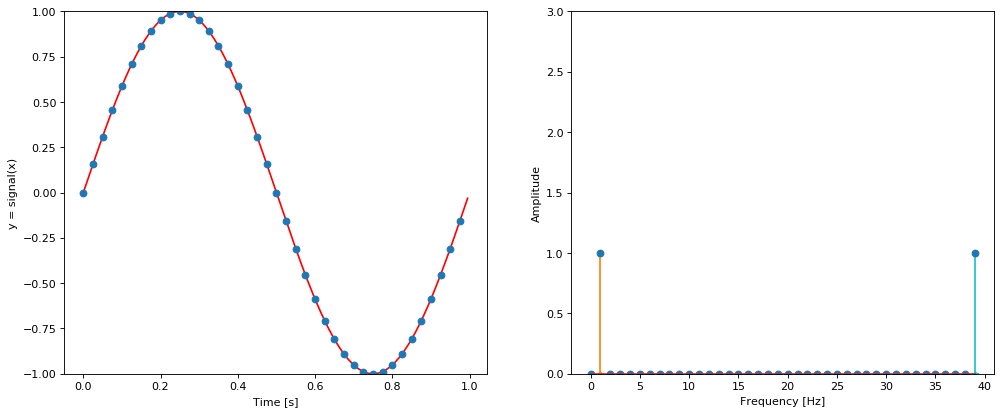

In [69]:
# f=1, A=1, LP=1
wyswietlFunkcje(1, 1, 40, 1.0)

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


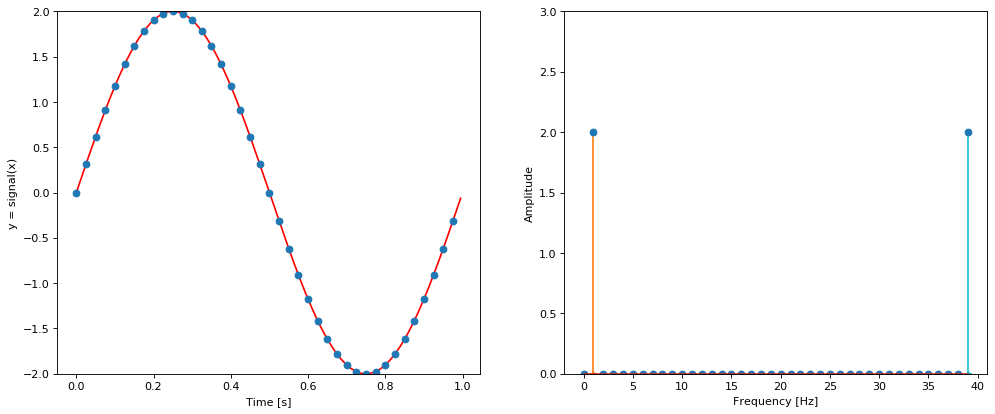

In [70]:
# f=1, A=2, LP=1
wyswietlFunkcje(2, 1, 40, 1.0)

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


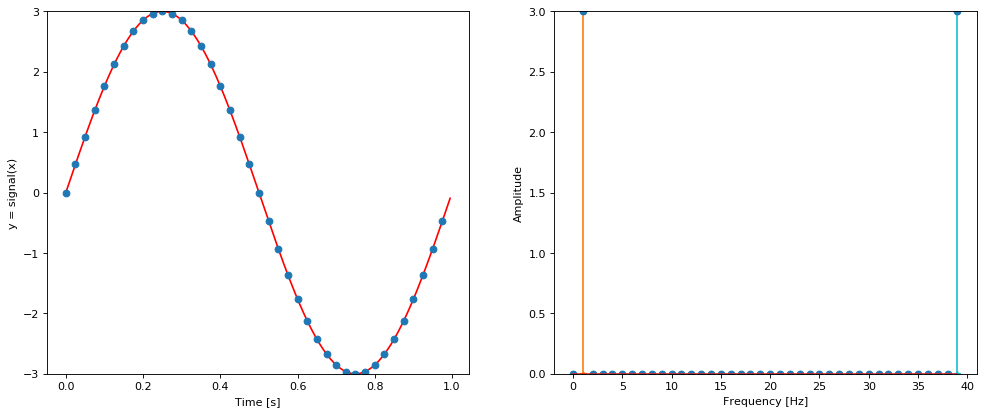

In [71]:
# f=1, A=3, LP=1
wyswietlFunkcje(3, 1, 40, 1.0)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


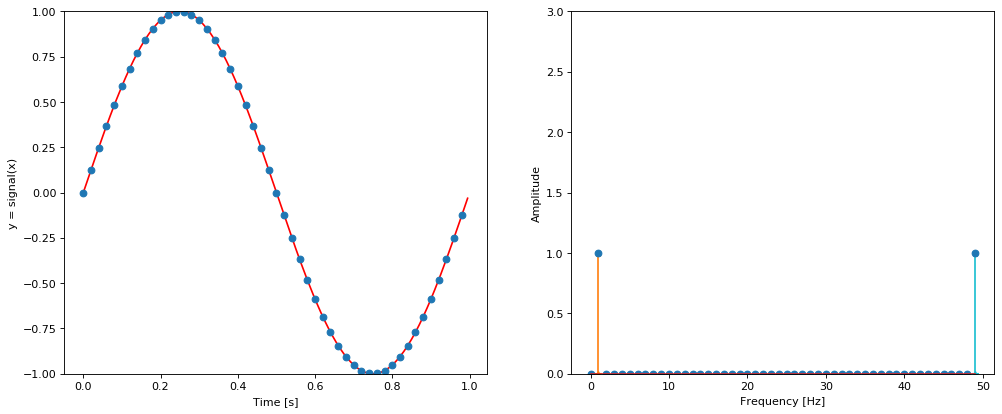

In [72]:
# f=1, w=50, LP=1
wyswietlFunkcje(1, 1, 50, 1.0)

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


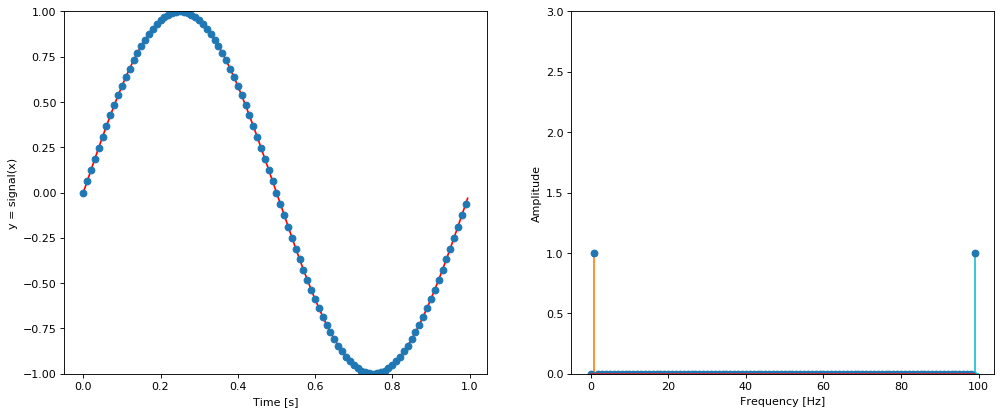

In [73]:
# f=1, w=100, LP=1
wyswietlFunkcje(1, 1, 100, 1.0)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


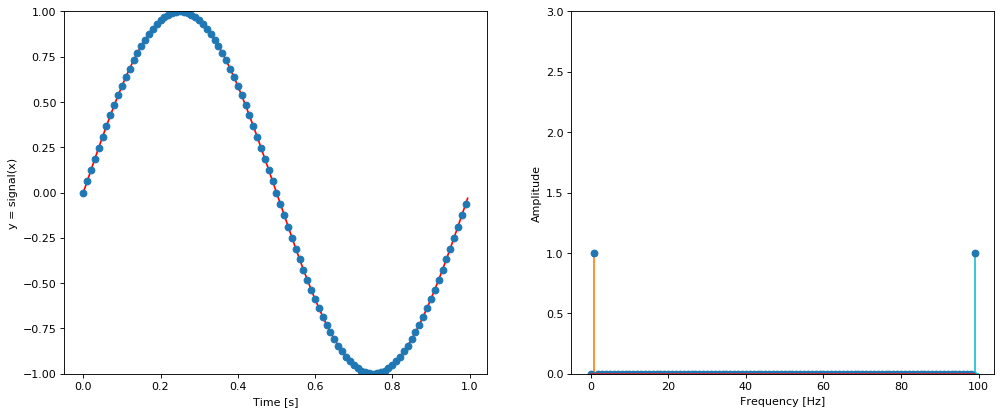

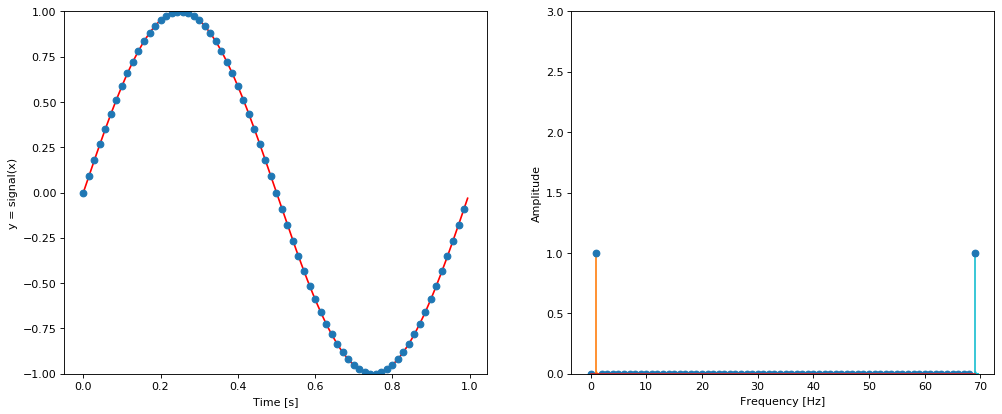

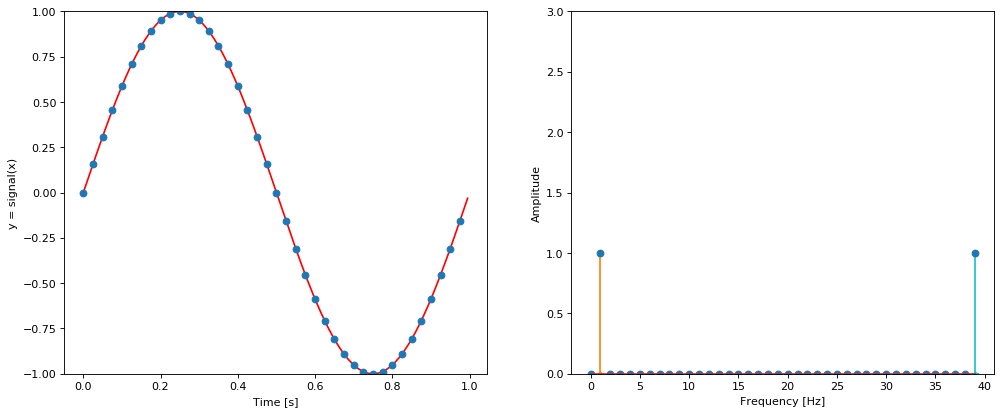

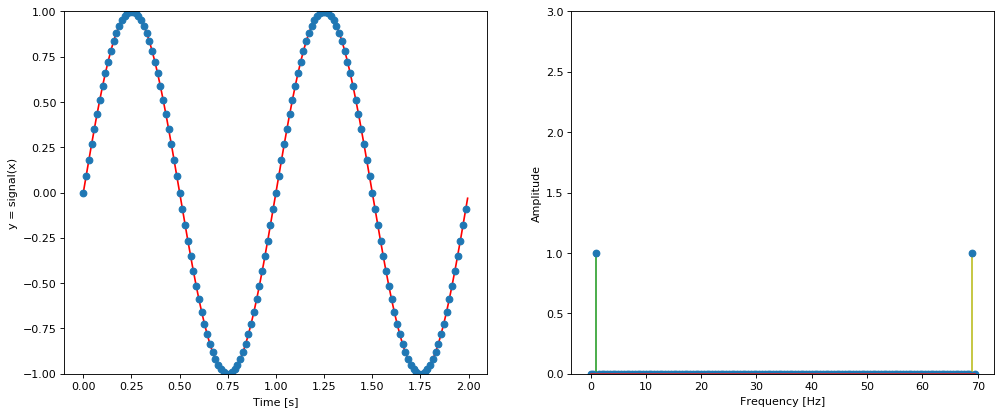

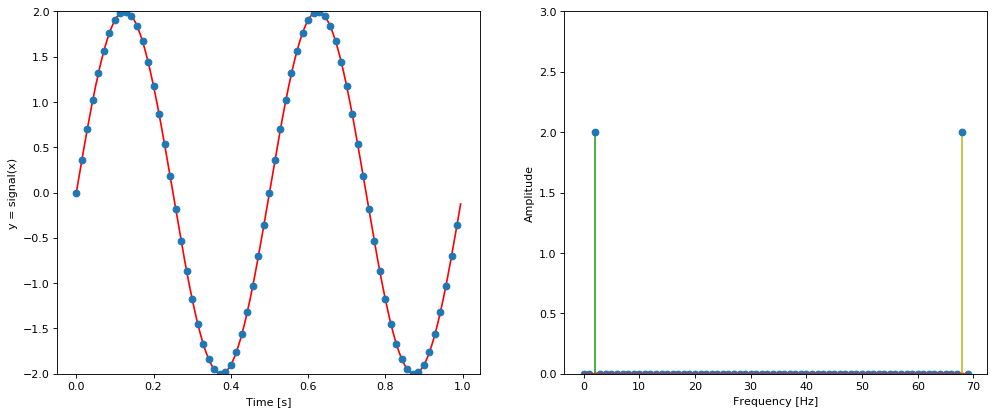

In [74]:
# popraw oś OY
wyswietlFunkcje(1, 1, 100, 1.0)
wyswietlFunkcje(1, 1, 70, 1.0)
wyswietlFunkcje(1, 1, 40, 1.0)

wyswietlFunkcje(1, 2, 70, 1.0)
wyswietlFunkcje(2, 2, 70, 2.0)

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


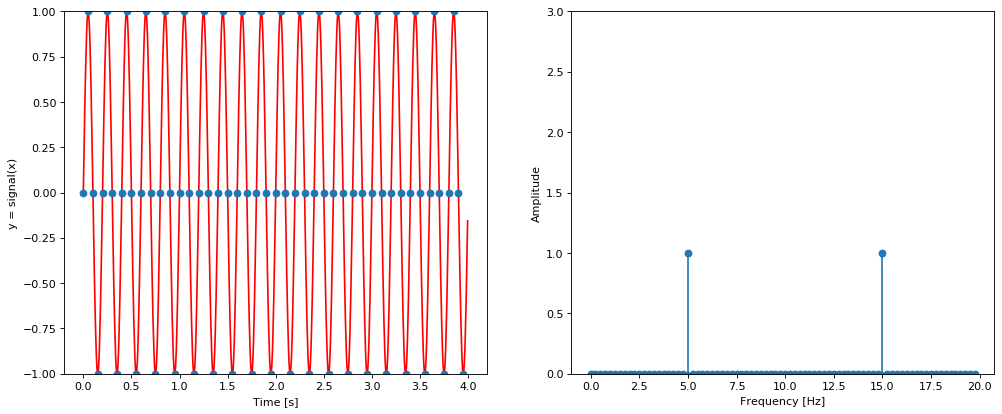

In [75]:
# f=5, w=20, LP=20
wyswietlFunkcje(1, 20, 20, 5.0)

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


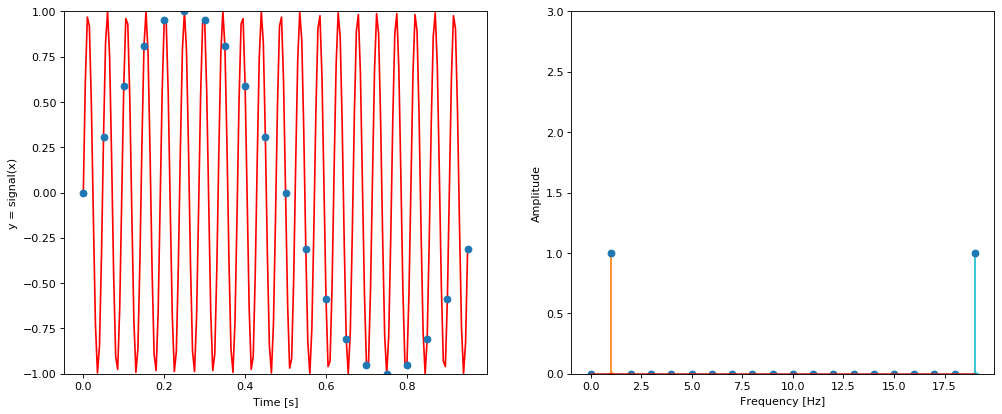

In [76]:
# f=21, w=20, LP=20
wyswietlFunkcje(1, 20, 20, 21.0)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


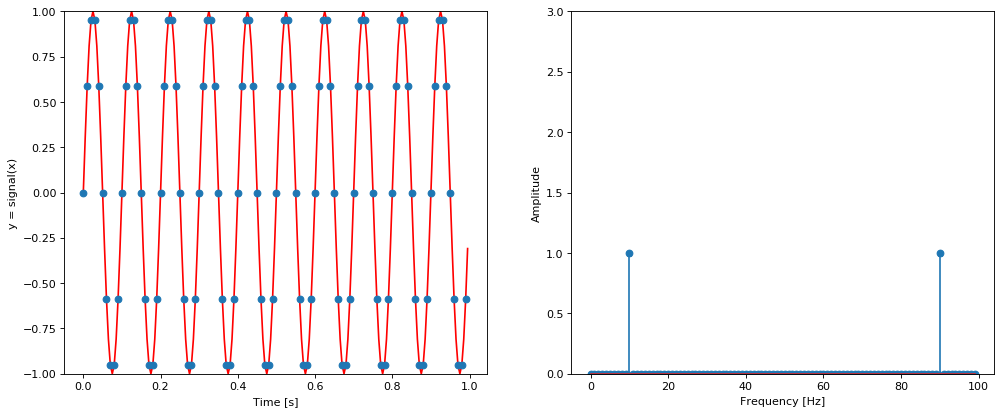

In [77]:
# f=10, w=100, A=1, LP=10
wyswietlFunkcje(1, 10, 100, 10.0)

ii) $sin(2*pi*t*f)$, $f=20Hz$

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


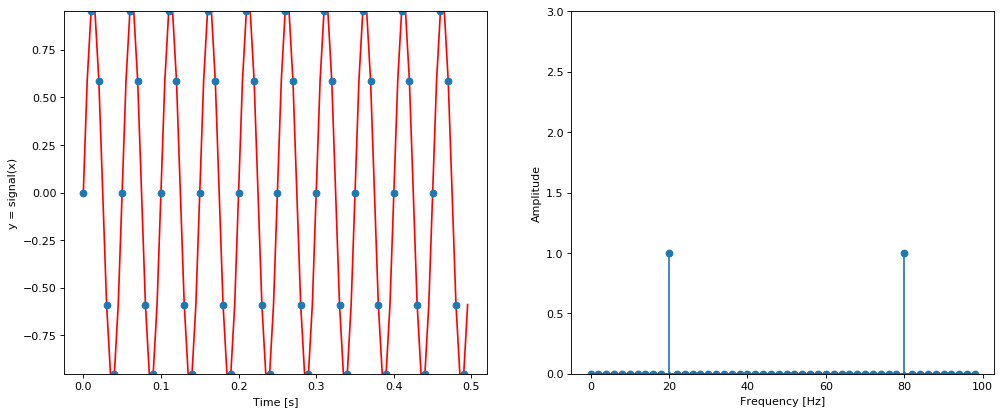

In [78]:
# f=20, w=100, A=1, LP=10
wyswietlFunkcje(1, 10, 100, 20.0)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


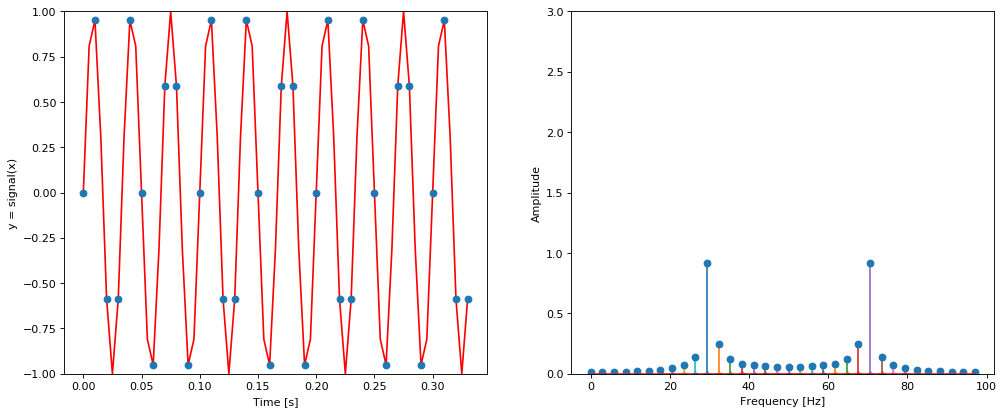

In [79]:
# f=30, w=100, A=1, LP=10
wyswietlFunkcje(1, 10, 100, 30.0)

iv) $sin(2*pi*t*f)$, $f=40Hz$

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


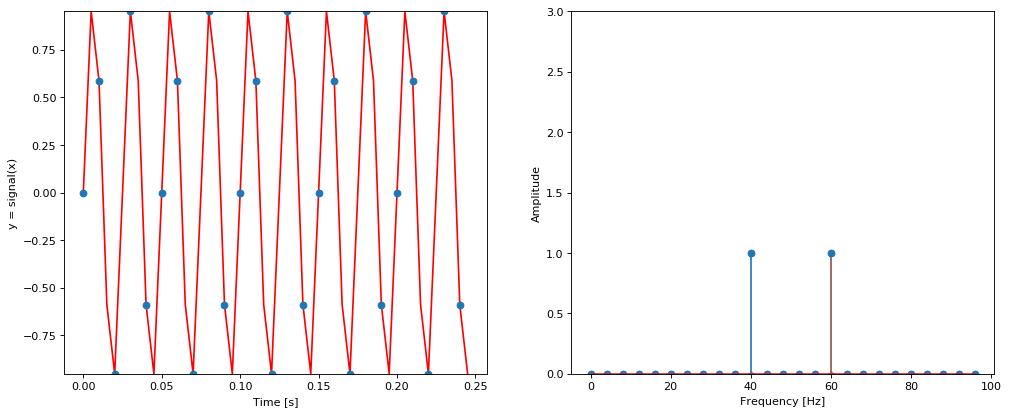

In [80]:
# f=40, w=100, A=1, LP=10
wyswietlFunkcje(1, 10, 100, 40.0)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


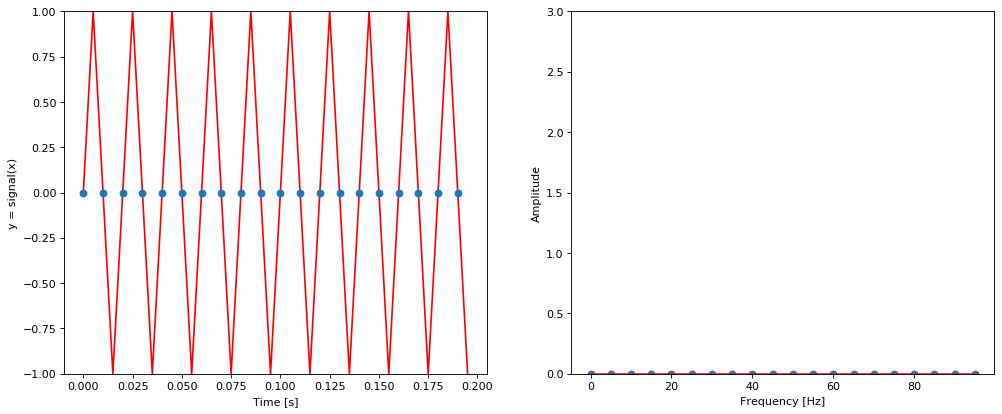

In [81]:
# f=50, w=100, A=1, LP=10
wyswietlFunkcje(1, 10, 100, 50.0)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


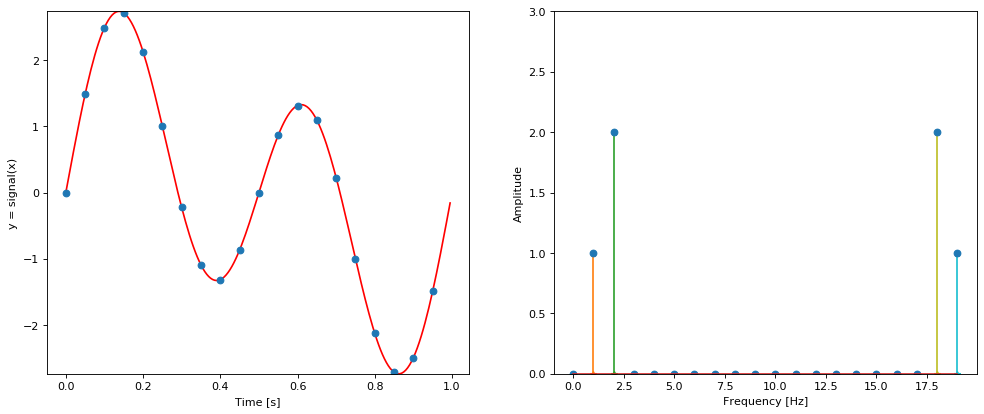

In [114]:
# Wyrysuj sygnał
wyswietlFunkcje(1, 1, 20, 1.0, lambda x: sin(2*pi*x*1) + 2*sin(4*pi*x*1))

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


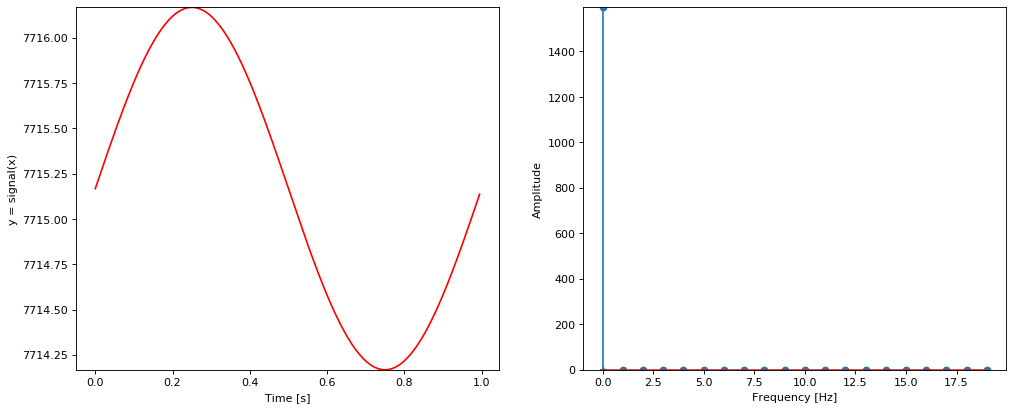

In [139]:
A = random.random()*0.06 + 0.02
f = random.random()*5.0 + 5.0
phase = random.random()*2*pi
wyswietlFunkcje(1, 1, 20, 1.0, lambda x: sin(2*pi*x*1) + np.sum([sin(A*pi*x*f + phase) for i in range(100)]))

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


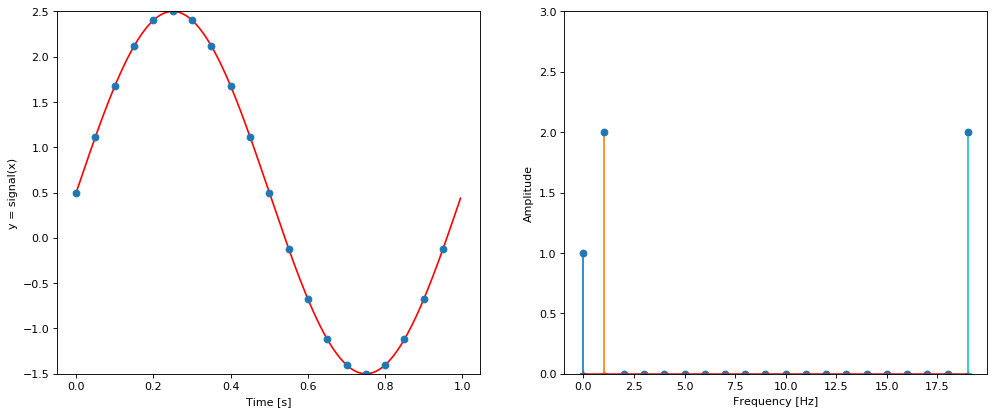

In [140]:
# Wyrysuj sygnał
wyswietlFunkcje(1, 1, 20, 1.0, lambda x: 0.5 + 2*sin(2*pi*x*1))

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

[2.66113379e-17 1.00000000e+00 7.49003714e-17 3.18962469e-17
 3.07626907e-17 1.06179788e-16 1.04338729e-16 1.46724178e-17
 6.70066345e-17 8.88178420e-17 3.77135681e-17 8.88178420e-17
 6.70066345e-17 1.46724178e-17 1.04338729e-16 1.06179788e-16
 3.07626907e-17 3.18962469e-17 7.49003714e-17 1.00000000e+00] [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 180. 180. 180.
 180. 180. 180. 180. 180. 180.]


D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:64: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


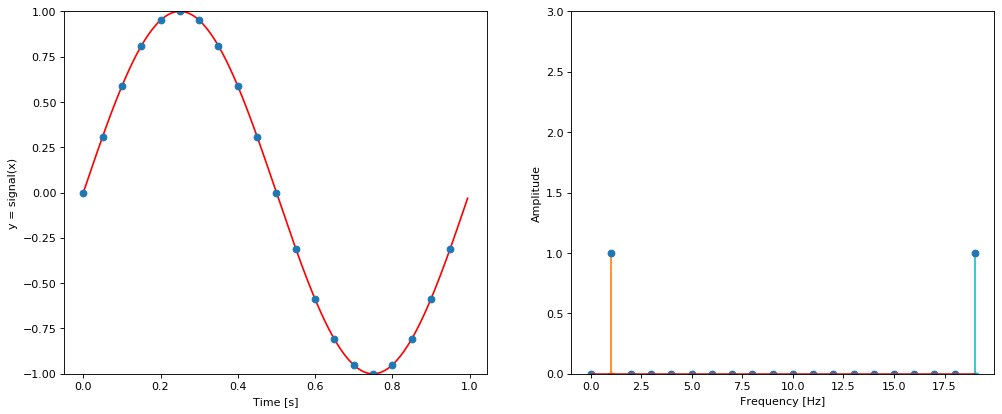

In [145]:
# faza = 0
wyswietlFunkcje(1, 1, 20, 1.0, lambda x: sin(2*pi*x*1))

[1.11022302e-17 1.00000000e+00 1.03966173e-16 5.84492418e-17
 8.83411034e-17 1.33688556e-16 6.72443387e-17 6.86936257e-17
 1.30566786e-16 1.33226763e-16 1.11022302e-17 1.33226763e-16
 1.30566786e-16 6.86936257e-17 6.72443387e-17 1.33688556e-16
 8.83411034e-17 5.84492418e-17 1.03966173e-16 1.00000000e+00] [  0.   0.   0.   0.   0.   0.   0.   0. 180. 180. 180. 180. 180. 180.
 180. 180. 180. 180.   0.   0.]


D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:64: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


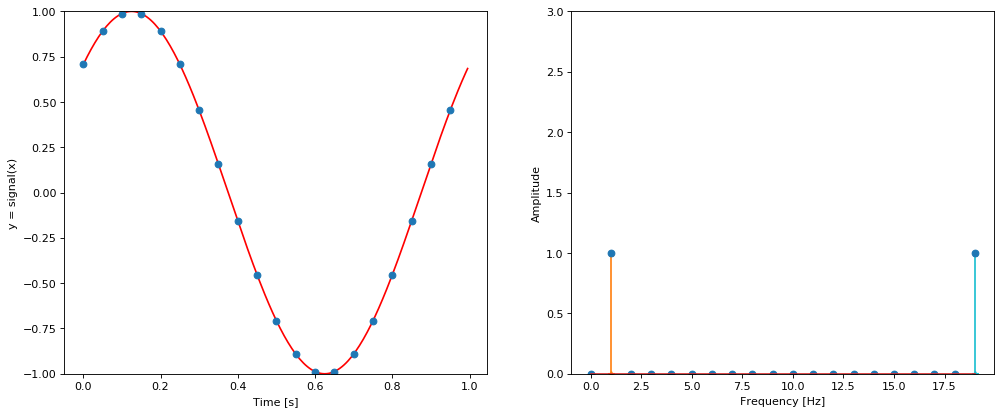

In [144]:
# faza = pi/4
wyswietlFunkcje(1, 1, 20, 1.0, lambda x: sin(2*pi*x*1 + pi/4))

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [83]:
# wygeneruj wektor x
x = random.random(10)
x

array([0.83776035, 0.04921841, 0.05398492, 0.9297574 , 0.38581029,
       0.17241381, 0.4240213 , 0.40565697, 0.30445252, 0.21485492])

In [87]:
# oblicz fft z x
ft = fft(x)
ft

array([ 3.77793088+0.j        , -0.07808363-0.1404217j ,
       -0.02832587+0.57646852j,  1.62438606+0.35470785j,
        0.66479583-0.66175914j,  0.23412787+0.j        ,
        0.66479583+0.66175914j,  1.62438606-0.35470785j,
       -0.02832587-0.57646852j, -0.07808363+0.1404217j ])

In [89]:
# oblicz ifft
ift = ifft(fft(x))
ift

array([0.83776035+0.j, 0.04921841+0.j, 0.05398492+0.j, 0.9297574 +0.j,
       0.38581029+0.j, 0.17241381+0.j, 0.4240213 +0.j, 0.40565697+0.j,
       0.30445252+0.j, 0.21485492+0.j])

In [93]:
#porownaj x z ifft(fft(x)), wystarczy print
print(x)

[0.83776035 0.04921841 0.05398492 0.9297574  0.38581029 0.17241381
 0.4240213  0.40565697 0.30445252 0.21485492]


In [92]:
print(ift)

[0.83776035+0.j 0.04921841+0.j 0.05398492+0.j 0.9297574 +0.j
 0.38581029+0.j 0.17241381+0.j 0.4240213 +0.j 0.40565697+0.j
 0.30445252+0.j 0.21485492+0.j]
